In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Propsih/test/main/data_test.csv', sep = ';')
df

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0
...,...,...,...,...,...
805816,4243322997,28.02.2022,2.0,0.0,0.0
805817,67461867,28.02.2022,3.0,0.0,0.0
805818,302417315,28.02.2022,NaN,NaN,NaN
805819,1780553365,28.02.2022,4.0,0.0,2.0


In [3]:
df.describe()

,CLIENT_ID,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
count,8.058210e+05,711169.000000,711169.000000,711169.000000
mean,2.144370e+09,11.586834,3.273264,4.508691
std,1.240761e+09,15.670639,5.588272,7.469828
min,8.294000e+03,0.000000,0.000000,0.000000
25%,1.068350e+09,3.000000,0.000000,1.000000
50%,2.143822e+09,7.000000,2.000000,2.000000
75%,3.220979e+09,15.000000,4.000000,5.000000
max,4.294935e+09,1247.000000,555.000000,563.000000


In [4]:
df.describe(include = ['object'])

,VALUE_DAY
count,805821
unique,6
top,28.02.2022
freq,139215


In [5]:
df['VALUE_DAY'] = pd.to_datetime(df['VALUE_DAY'])

<ipython-input-5-ac06d2d7e636>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['VALUE_DAY'] = pd.to_datetime(df['VALUE_DAY'])


In [6]:
df

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,2021-09-30,18.0,8.0,9.0
1,181778433,2021-09-30,7.0,3.0,3.0
2,4271531990,2021-09-30,2.0,0.0,0.0
3,3949165697,2021-09-30,15.0,4.0,5.0
4,1926920317,2021-09-30,3.0,0.0,0.0
...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0
805817,67461867,2022-02-28,3.0,0.0,0.0
805818,302417315,2022-02-28,NaN,NaN,NaN
805819,1780553365,2022-02-28,4.0,0.0,2.0


In [7]:
df['first_activity'] = df.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')

df['cohort_month'] = df['first_activity'].dt.to_period('M')

df['cohort_period'] = ((df['VALUE_DAY'].dt.year - df['first_activity'].dt.year) * 12 +
                         (df['VALUE_DAY'].dt.month - df['first_activity'].dt.month))

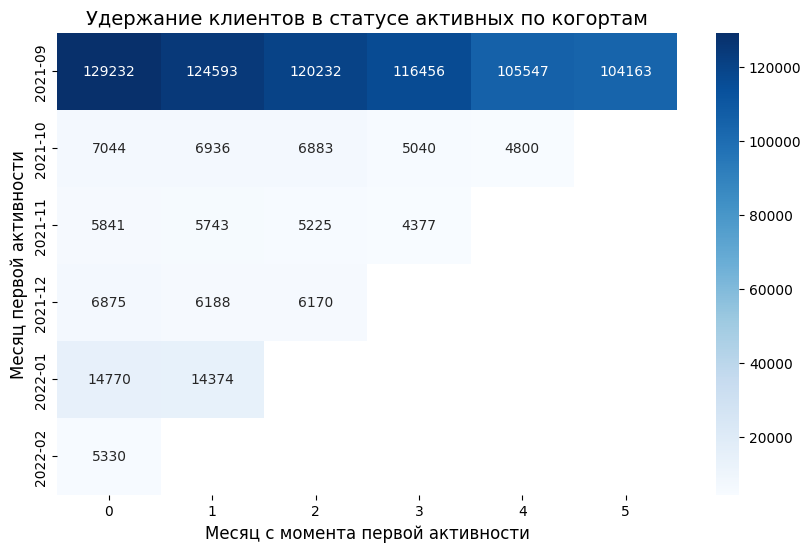

In [8]:
retention = df.pivot_table(index='cohort_month', columns='cohort_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax = sns.heatmap(retention, annot=True, fmt='.0f', cmap="Blues")
ax.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax.set_ylabel('Месяц первой активности', fontsize=12)
ax.set_title('Удержание клиентов в статусе активных по когортам', fontsize=14)
plt.show()

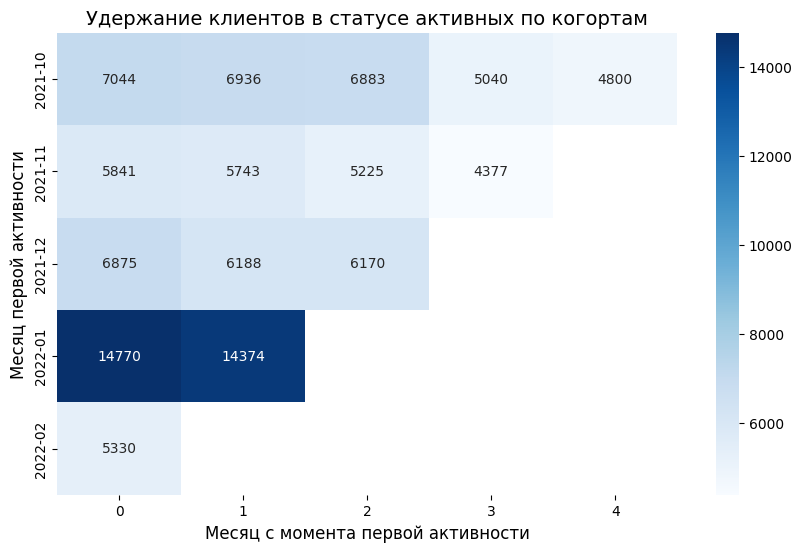

In [9]:
retention = df[df['first_activity']!='2021-09-30'].pivot_table(index='cohort_month', columns='cohort_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax = sns.heatmap(retention, annot=True, fmt='.0f', cmap="Blues")
ax.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax.set_ylabel('Месяц первой активности', fontsize=12)
ax.set_title('Удержание клиентов в статусе активных по когортам', fontsize=14)
plt.show()

In [15]:
filtered_data1 = df[df['DIGITAL_30_CNT'].notna()]
dig_data = filtered_data1[filtered_data1['DIGITAL_30_CNT']>0]
dig_data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,first_activity,cohort_month,cohort_period
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09-30,2021-09,0
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09-30,2021-09,0
2,4271531990,2021-09-30,2.0,0.0,0.0,2021-09-30,2021-09,0
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09-30,2021-09,0
4,1926920317,2021-09-30,3.0,0.0,0.0,2021-09-30,2021-09,0
...,...,...,...,...,...,...,...,...
805815,4253033414,2022-02-28,2.0,0.0,0.0,2021-09-30,2021-09,5
805816,4243322997,2022-02-28,2.0,0.0,0.0,2021-09-30,2021-09,5
805817,67461867,2022-02-28,3.0,0.0,0.0,2021-09-30,2021-09,5
805819,1780553365,2022-02-28,4.0,0.0,2.0,2022-01-31,2022-01,1


In [17]:
dig_data['first_dig_activity'] = dig_data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')

dig_data['cohort_dig_month'] = dig_data['first_dig_activity'].dt.to_period('M')

dig_data['cohort_dig_period'] = ((dig_data['VALUE_DAY'].dt.year - dig_data['first_dig_activity'].dt.year) * 12 +
                         (dig_data['VALUE_DAY'].dt.month - dig_data['first_dig_activity'].dt.month))

<ipython-input-17-ee82b619d1cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dig_data['first_dig_activity'] = dig_data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')
<ipython-input-17-ee82b619d1cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dig_data['cohort_dig_month'] = dig_data['first_dig_activity'].dt.to_period('M')
<ipython-input-17-ee82b619d1cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [18]:
dig_data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,first_activity,cohort_month,cohort_period,first_dig_activity,cohort_dig_month,cohort_dig_period
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
2,4271531990,2021-09-30,2.0,0.0,0.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
4,1926920317,2021-09-30,3.0,0.0,0.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
...,...,...,...,...,...,...,...,...,...,...,...
805815,4253033414,2022-02-28,2.0,0.0,0.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5
805816,4243322997,2022-02-28,2.0,0.0,0.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5
805817,67461867,2022-02-28,3.0,0.0,0.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5
805819,1780553365,2022-02-28,4.0,0.0,2.0,2022-01-31,2022-01,1,2022-01-31,2022-01,1


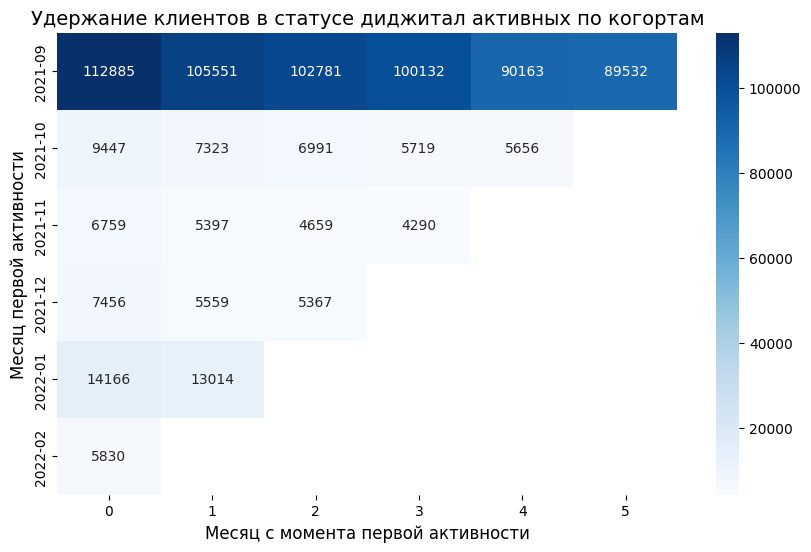

In [22]:
retention1 = dig_data.pivot_table(index='cohort_dig_month', columns='cohort_dig_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax1 = sns.heatmap(retention1, annot=True, fmt='.0f', cmap="Blues")
ax1.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax1.set_ylabel('Месяц первой активности', fontsize=12)
ax1.set_title('Удержание клиентов в статусе диджитал активных по когортам', fontsize=14)
plt.show()

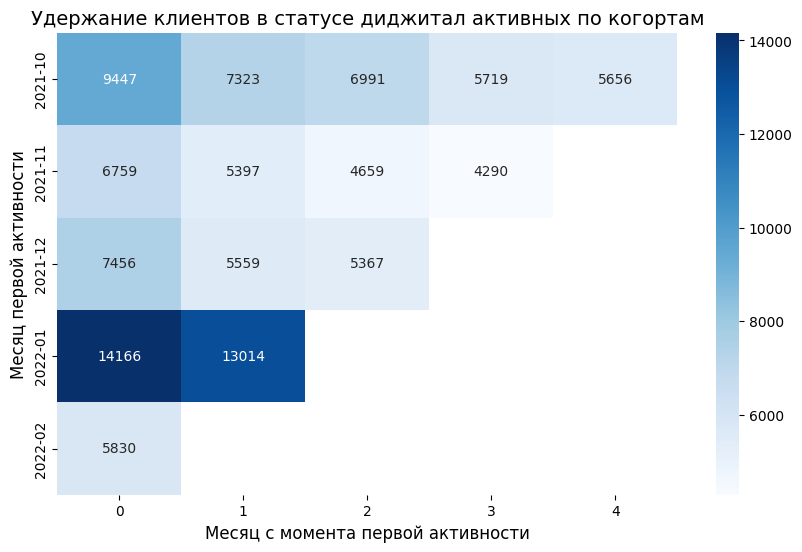

In [23]:
retention1 = dig_data[dig_data['first_dig_activity']!='2021-09-30'].pivot_table(index='cohort_dig_month', columns='cohort_dig_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax1 = sns.heatmap(retention1, annot=True, fmt='.0f', cmap="Blues")
ax1.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax1.set_ylabel('Месяц первой активности', fontsize=12)
ax1.set_title('Удержание клиентов в статусе диджитал активных по когортам', fontsize=14)
plt.show()

In [30]:
filtered_data3 = df[df['OPER_ACTIVE_30_CNT'].notna()]
oper_data = filtered_data3[filtered_data3['OPER_ACTIVE_30_CNT']>0]
oper_data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,first_activity,cohort_month,cohort_period
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09-30,2021-09,0
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09-30,2021-09,0
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09-30,2021-09,0
6,2932045862,2021-09-30,13.0,8.0,8.0,2021-09-30,2021-09,0
7,1739929247,2021-09-30,25.0,10.0,14.0,2021-09-30,2021-09,0
...,...,...,...,...,...,...,...,...
805810,2831917488,2022-02-28,20.0,5.0,7.0,2022-01-31,2022-01,1
805811,243099052,2022-02-28,6.0,2.0,9.0,2021-09-30,2021-09,5
805813,2961399891,2022-02-28,10.0,2.0,2.0,2021-09-30,2021-09,5
805814,520064486,2022-02-28,12.0,5.0,7.0,2022-02-28,2022-02,0


In [31]:
oper_data['first_oper_activity'] = oper_data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')

oper_data['cohort_oper_month'] = oper_data['first_oper_activity'].dt.to_period('M')

oper_data['cohort_oper_period'] = ((oper_data['VALUE_DAY'].dt.year - oper_data['first_oper_activity'].dt.year) * 12 +
                         (oper_data['VALUE_DAY'].dt.month - oper_data['first_oper_activity'].dt.month))

<ipython-input-31-ecec90518fc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oper_data['first_oper_activity'] = oper_data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')
<ipython-input-31-ecec90518fc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oper_data['cohort_oper_month'] = oper_data['first_oper_activity'].dt.to_period('M')
<ipython-input-31-ecec90518fc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [32]:
oper_data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,first_activity,cohort_month,cohort_period,first_oper_activity,cohort_oper_month,cohort_oper_period
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
6,2932045862,2021-09-30,13.0,8.0,8.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
7,1739929247,2021-09-30,25.0,10.0,14.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
...,...,...,...,...,...,...,...,...,...,...,...
805810,2831917488,2022-02-28,20.0,5.0,7.0,2022-01-31,2022-01,1,2022-01-31,2022-01,1
805811,243099052,2022-02-28,6.0,2.0,9.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5
805813,2961399891,2022-02-28,10.0,2.0,2.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5
805814,520064486,2022-02-28,12.0,5.0,7.0,2022-02-28,2022-02,0,2022-02-28,2022-02,0


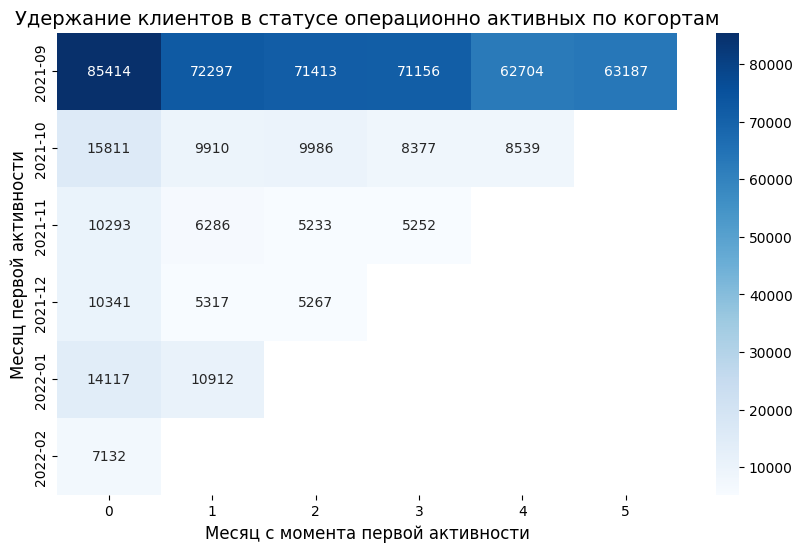

In [33]:
retention3 = oper_data.pivot_table(index='cohort_oper_month', columns='cohort_oper_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax3 = sns.heatmap(retention3, annot=True, fmt='.0f', cmap="Blues")
ax3.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax3.set_ylabel('Месяц первой активности', fontsize=12)
ax3.set_title('Удержание клиентов в статусе операционно активных по когортам', fontsize=14)
plt.show()

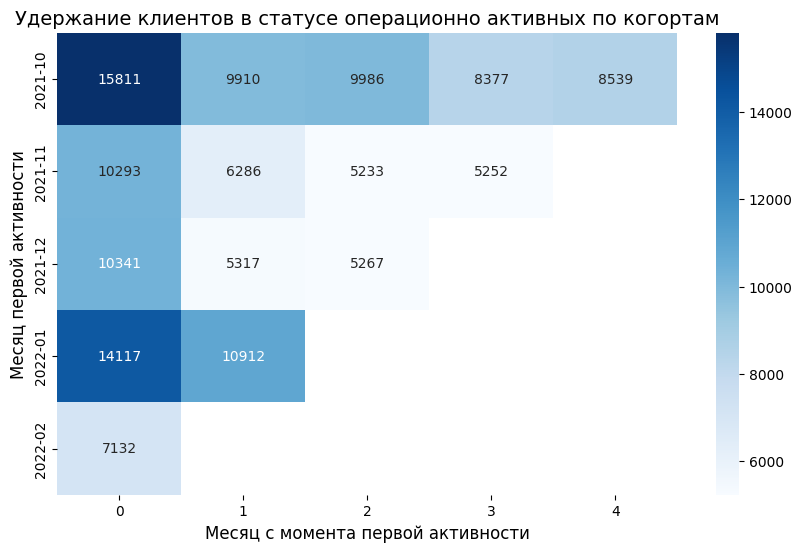

In [34]:
retention3 = oper_data[oper_data['first_oper_activity']!='2021-09-30'].pivot_table(index='cohort_oper_month', columns='cohort_oper_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax3 = sns.heatmap(retention3, annot=True, fmt='.0f', cmap="Blues")
ax3.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax3.set_ylabel('Месяц первой активности', fontsize=12)
ax3.set_title('Удержание клиентов в статусе операционно активных по когортам', fontsize=14)
plt.show()

In [29]:
filtered_data2 = df[df['TRAN_ACTIVE_30_CNT'].notna()]
tran_data = filtered_data2[filtered_data2['TRAN_ACTIVE_30_CNT']>0]
tran_data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,first_activity,cohort_month,cohort_period
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09-30,2021-09,0
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09-30,2021-09,0
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09-30,2021-09,0
6,2932045862,2021-09-30,13.0,8.0,8.0,2021-09-30,2021-09,0
7,1739929247,2021-09-30,25.0,10.0,14.0,2021-09-30,2021-09,0
...,...,...,...,...,...,...,...,...
805809,2108798184,2022-02-28,8.0,1.0,1.0,2021-11-30,2021-11,3
805810,2831917488,2022-02-28,20.0,5.0,7.0,2022-01-31,2022-01,1
805811,243099052,2022-02-28,6.0,2.0,9.0,2021-09-30,2021-09,5
805813,2961399891,2022-02-28,10.0,2.0,2.0,2021-09-30,2021-09,5


In [25]:
tran_data['first_tran_activity'] = tran_data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')

tran_data['cohort_tran_month'] = tran_data['first_tran_activity'].dt.to_period('M')

tran_data['cohort_tran_period'] = ((tran_data['VALUE_DAY'].dt.year - tran_data['first_tran_activity'].dt.year) * 12 +
                         (tran_data['VALUE_DAY'].dt.month - tran_data['first_tran_activity'].dt.month))

<ipython-input-25-7f130ab9d119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_data['first_tran_activity'] = tran_data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')
<ipython-input-25-7f130ab9d119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_data['cohort_tran_month'] = tran_data['first_tran_activity'].dt.to_period('M')
<ipython-input-25-7f130ab9d119>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [26]:
tran_data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,first_activity,cohort_month,cohort_period,first_tran_activity,cohort_tran_month,cohort_tran_period
0,3596869440,2021-09-30,18.0,8.0,9.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
1,181778433,2021-09-30,7.0,3.0,3.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
3,3949165697,2021-09-30,15.0,4.0,5.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
6,2932045862,2021-09-30,13.0,8.0,8.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
7,1739929247,2021-09-30,25.0,10.0,14.0,2021-09-30,2021-09,0,2021-09-30,2021-09,0
...,...,...,...,...,...,...,...,...,...,...,...
805809,2108798184,2022-02-28,8.0,1.0,1.0,2021-11-30,2021-11,3,2021-12-31,2021-12,2
805810,2831917488,2022-02-28,20.0,5.0,7.0,2022-01-31,2022-01,1,2022-01-31,2022-01,1
805811,243099052,2022-02-28,6.0,2.0,9.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5
805813,2961399891,2022-02-28,10.0,2.0,2.0,2021-09-30,2021-09,5,2021-09-30,2021-09,5


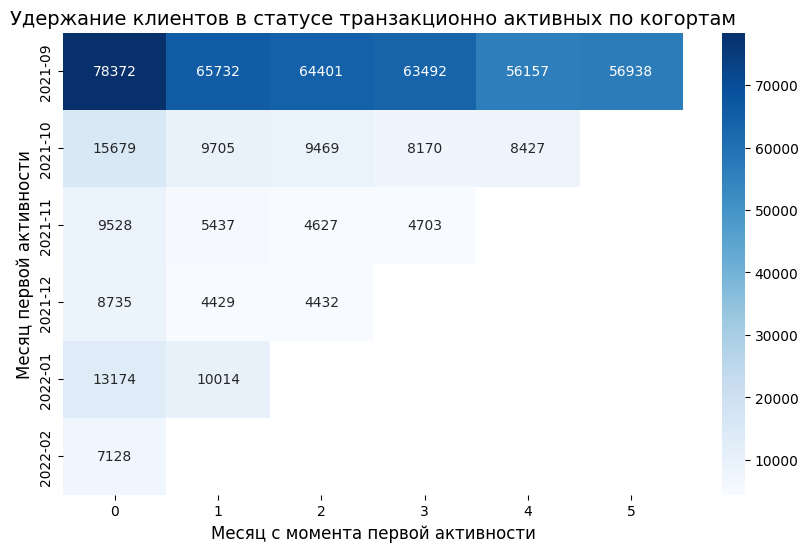

In [27]:
retention2 = tran_data.pivot_table(index='cohort_tran_month', columns='cohort_tran_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax2 = sns.heatmap(retention2, annot=True, fmt='.0f', cmap="Blues")
ax2.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax2.set_ylabel('Месяц первой активности', fontsize=12)
ax2.set_title('Удержание клиентов в статусе транзакционно активных по когортам', fontsize=14)
plt.show()

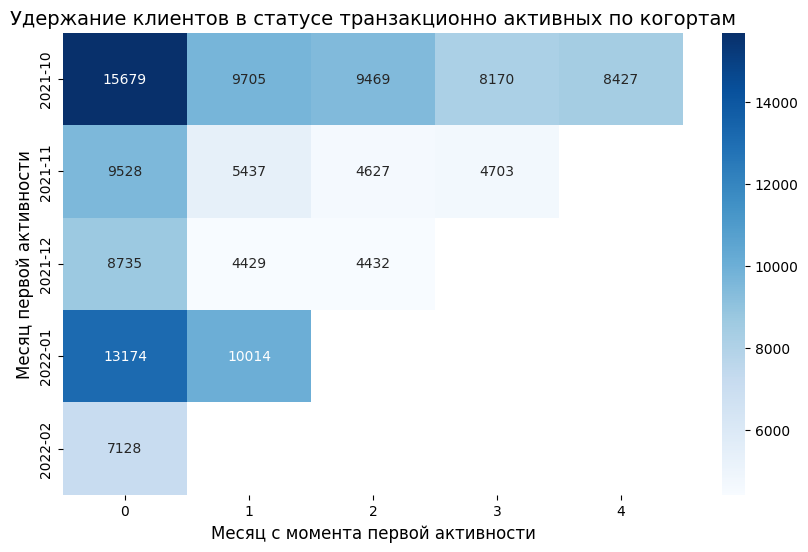

In [28]:
retention2 = tran_data[tran_data['first_tran_activity']!='2021-09-30'].pivot_table(index='cohort_tran_month', columns='cohort_tran_period', values='CLIENT_ID', aggfunc='nunique')

plt.figure(figsize=(10, 6))
ax2 = sns.heatmap(retention2, annot=True, fmt='.0f', cmap="Blues")
ax2.set_xlabel('Месяц с момента первой активности', fontsize=12)
ax2.set_ylabel('Месяц первой активности', fontsize=12)
ax2.set_title('Удержание клиентов в статусе транзакционно активных по когортам', fontsize=14)
plt.show()

<ipython-input-39-8ecf8bf7cf1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_active['is_transactional'] = digital_active['TRAN_ACTIVE_30_CNT'] > 0


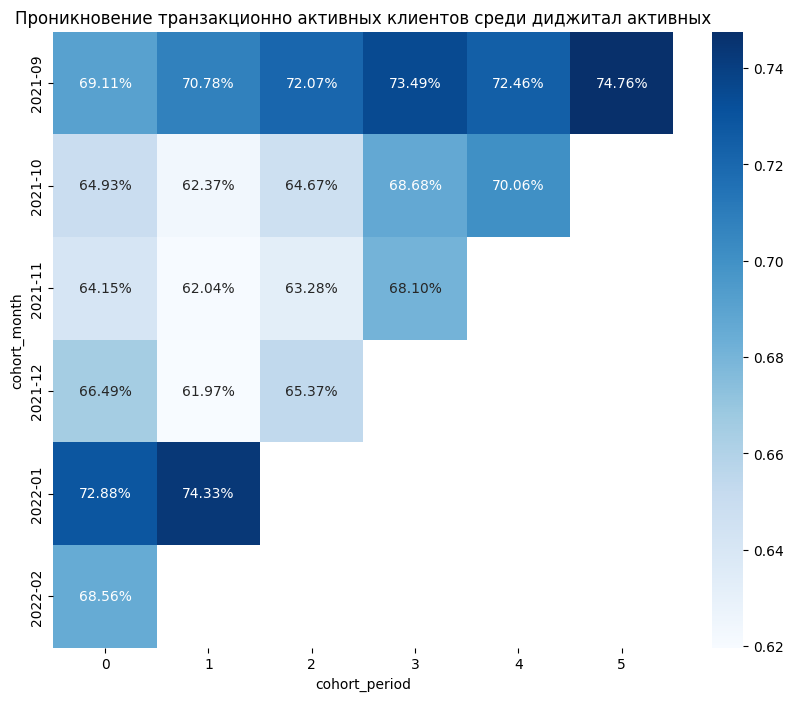

In [39]:
digital_active = df[df['DIGITAL_30_CNT'] > 0]

digital_active['is_transactional'] = digital_active['TRAN_ACTIVE_30_CNT'] > 0

cohort_digital = digital_active.groupby(['cohort_month', 'cohort_period']).agg({
    'CLIENT_ID': 'nunique',
    'is_transactional': 'sum'
}).reset_index()

cohort_digital['penetration'] = cohort_digital['is_transactional'] / cohort_digital['CLIENT_ID']

penetration_matrix = cohort_digital.pivot(index='cohort_month', columns='cohort_period', values='penetration')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(penetration_matrix, annot=True, fmt='.2%', cmap="Blues")
plt.title('Проникновение транзакционно активных клиентов среди диджитал активных')
plt.show()